Question 1:

Part (i):

*** No CODEPAGE record, no encoding_override: will use 'ascii'
      X      Y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
..  ...    ...
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5

[63 rows x 2 columns]


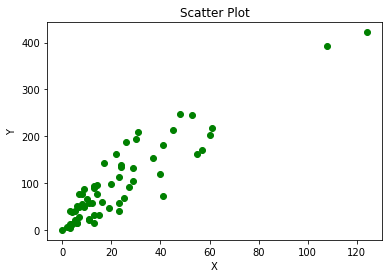


 Finding the parameters using OLS method

 Parameters found!

Visualization of the linear regression line



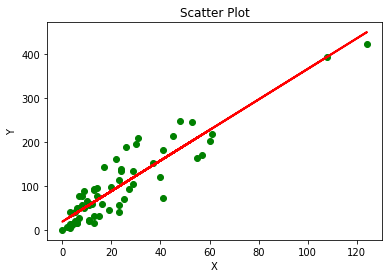

In [ ]:
# developing the hypothesis using ordinary least square method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('dataset.xls'); # importing data from excel sheet
print(df)

# extracting values from the pandas DataFrame
data = df.values.tolist()
x = []
y = []
for row in data:
  x.append(row[0])
  y.append(row[1])

# displaying a scatter plot of the dataset to get a visual idea of the data pattern

plt.scatter(x, y, color = 'green')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print('\n Finding the parameters using OLS method')

# Result of partial differentiation to minimize loss function
covariance = np.cov(x,y)[0][1]
variance = np.var(x)

a = covariance / variance 
b  = np.mean(y) - np.mean(x) * a
# parameter value found for which error is minimum
print('\n Parameters found!')

# defining the hypothesis as a function
def hypothesis(x):
  return a * x + b

prediction = []
for i in x:
  prediction.append(hypothesis(i))


print("\nVisualization of the linear regression line\n")

plt.scatter(x, y, color = 'green')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, prediction, linewidth = 2, color = 'red')
plt.show()

part (ii)

Training dataset:
[[108.0, 392.5], [19.0, 46.2], [13.0, 15.7], [124.0, 422.2], [40.0, 119.4], [57.0, 170.9], [23.0, 56.9], [14.0, 77.5], [45.0, 214.0], [10.0, 65.3], [5.0, 20.9], [48.0, 248.1], [11.0, 23.5], [23.0, 39.6], [7.0, 48.8], [2.0, 6.6], [24.0, 134.9], [6.0, 50.9], [3.0, 4.4], [23.0, 113.0], [6.0, 14.8], [9.0, 48.7], [9.0, 52.1], [3.0, 13.2], [29.0, 103.9], [7.0, 77.5], [4.0, 11.8], [20.0, 98.1], [7.0, 27.9], [4.0, 38.1], [0.0, 0.0], [25.0, 69.2], [6.0, 14.6], [5.0, 40.3], [22.0, 161.5], [11.0, 57.2], [61.0, 217.6]]

 validation dataset:
[[12.0, 58.1], [4.0, 12.6], [16.0, 59.6], [13.0, 89.9], [60.0, 202.4], [41.0, 181.3], [37.0, 152.8], [55.0, 162.8], [41.0, 73.4], [11.0, 21.3], [27.0, 92.6], [8.0, 76.1], [3.0, 39.9]]

 Testing Dataset:
[[17.0, 142.1], [13.0, 93.0], [13.0, 31.9], [15.0, 32.1], [8.0, 55.6], [29.0, 133.3], [30.0, 194.5], [24.0, 137.9], [9.0, 87.4], [31.0, 209.8], [14.0, 95.5], [53.0, 244.6], [26.0, 187.5]]

Initial Training set MAE (mean absolute error) = 89.670

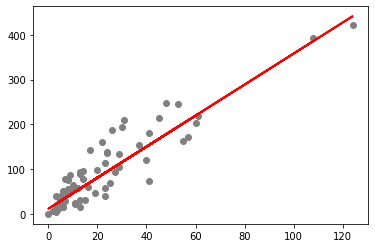

In [ ]:
# finding the hypothesis using gradient descent method
# extracting the 60% dataset from total dataset for training
import math
from sklearn import metrics
import matplotlib.pyplot as plt
training = []
for i in range(math.floor(len(data) * 3 / 5)):
  training.append(data[i])

print("Training dataset:")
print(training)

# extracting 20 % of the remaining 40% from total dataset for validation
validation = []
for i in range(math.floor(len(data) * 3 / 5), math.floor(len(data) * 4 / 5)):
  validation.append(data[i])

print('\n validation dataset:')
print(validation)

# extracting the remaining 20 % from the total dataset for testing
testing = []

for i in range(math.floor(len(data) * 4 / 5), len(data)):
  testing.append(data[i])

print('\n Testing Dataset:')
print(testing)

# function to return the predicted value by the model when run on a given dataset
def runTest(testing, a, b):
  prediction = []
  for i in range(len(testing)):
    temp = a * testing[i][0] + b
    prediction.append(temp)
  return prediction

# gradient descent expression which returns the new parameter values
def getNewParameterValue(training, parameters, learning_rate):
  temp = 0
  for i in range(len(training)):
    temp += (parameters[1] + parameters[0] * training[i][0] - training[i][1])
  b1 = parameters[1] - learning_rate * (temp / len(training))

  temp = 0
  for i in range(len(training)):
    temp += (parameters[1] + training[i][0] * parameters[0] - training[i][1]) *  training[i][0]
  a1 = parameters[0] - learning_rate * (temp / len(training))
  parameters[0] = a1
  parameters[1] = b1

# changing learning rate based on the slope on the loss function for training dataset
# we are changing the learning rate on the basis of slope in loss function dor training dataset not on the basis of the accuracy metric of validation dataset
# since both training and validation dataset are following very similar trend and a certain amount of jumps are occuring in initial iterations
def getLearningRate(validation, a, b, learning_rate):
  temp_a = 0
  temp_b = 0
  for i in range(len(validation)):
    temp_b += b + a * validation[i][0] - validation[i][1]
    temp_a += (b + a * validation[i][0] - validation[i][1]) * validation[i][0]
  
  slope_a = abs(temp_a / len(validation))
  slope_b = abs(temp_b / len(validation))
  avg_slope = (slope_a + slope_b) / 2
  
  if (avg_slope < 0.1):
    learning_rate = 0.0001
    return learning_rate
  if (avg_slope < 0.5):
    learning_rate = 0.0005
    return learning_rate
  return learning_rate


# Start model training
# y = ax + b

# initializing the parameters
a = 0
b = 0
learning_rate = 0.001
iteration = 0
training_prediction, validation_prediction = [], []
prev_avg_error = 100000000

# getting training set accuracy based on arbitrary initial parameter value
training_prediction = runTest(training, a, b)
trainingY, validationY = [],[]
for i in training:
  trainingY.append(i[1])

for i in validation:
  validationY.append(i[1])

accuracy_training = metrics.mean_absolute_error(trainingY, training_prediction)
print("\nInitial Training set MAE (mean absolute error) = " + str(accuracy_training))

validation_prediction = runTest(validation, a, b)
accuracy_validation = metrics.mean_absolute_error(validationY, validation_prediction)
print("\nInitial validation set MAE (mean absolute error) = " + str(accuracy_validation))

print("\nStart training and validation")

while (iteration <= 9000):
  # training for getting a new value of a and b
  parameters = [a, b]
  getNewParameterValue(training, parameters, learning_rate)
  a = parameters[0]
  b = parameters[1]
  #testing the new parameter values on training dataset
  training_prediction = runTest(training, a, b)
  accuracy_training = metrics.mean_absolute_error(trainingY, training_prediction)
   
  # testing on the validation dataset and finding the accuracy
  validation_prediction = runTest(validation, a, b)
  accuracy_validation = metrics.mean_absolute_error(validationY, validation_prediction)
  
  #running the new parameter value on validation set to change the value of learning rate (if needed)
  learning_rate = getLearningRate(training, a, b, learning_rate)  
  

  iteration += 1

print("\nTraining complete!")

print("\nTesting the regression model")
testing_prediction = []
testing_prediction = runTest(testing, a, b)
testingY = []
for i in testing:
  testingY.append(i[1])

accuracy_testing = metrics.mean_absolute_error(testingY, testing_prediction)
print("\nMAE in testing dataset = " + str(accuracy_testing))

#y = ax + b    --> regression line
print("\n a = %s , b = %s" % (a, b))
print("\nFinal Performance Metrics:")
print("MAE in training dataset = " + str(accuracy_training))
print("MAE in validation dataset = " + str(accuracy_validation))
print("MAE in testing dataset = " + str(accuracy_testing))


dataX,dataY = [],[]
for i in data:
  dataX.append(i[0])

for i in data:
  dataY.append(i[1])

prediction = runTest(data, a, b)

print('\n The regression line over the whole dataset')
plt.scatter(dataX, dataY, color = 'gray')
plt.plot(dataX, prediction, color = 'red', linewidth = 2)
plt.show()




Question 2:


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


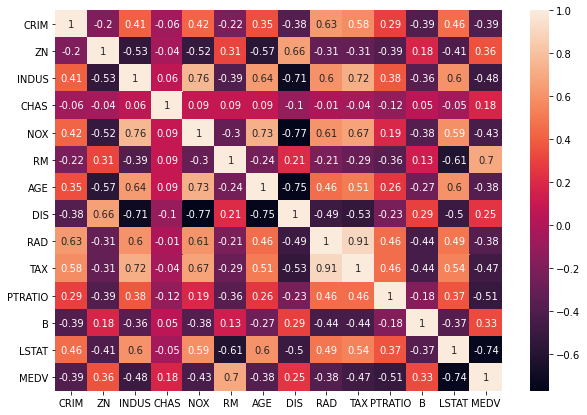

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
import seaborn as sns

# importing the boston housing dataset
boston = datasets.load_boston(return_X_y=False)

#storing the feature data of the housing dataset in a Pandas DataFrame
housing_data = pd.DataFrame(boston.data, columns = boston.feature_names)
data_temp = pd.DataFrame(boston.data, columns = boston.feature_names)
# Storing the target data of the housing dataset in a Pandas Dataframe
housing_target = pd.DataFrame(boston.target, columns = ['MEDV'])
data_temp['MEDV'] = boston.target


# now we will plot the correlation matrix that will measure the linear relationship between features and target
# this will help us to choose the features which actually determine the target and reject the other features
# the accepted features will be used in the training of the model
plt.figure(figsize=(10,7))
correlation_matrix = data_temp.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

# in the correlation matrix, MEDV (target) is strongly correlated with RM feature (positively correlated) and LSTAT feature (negatively correlated)
# so for model training (linear regression), we will choose the above two features only (RM and LSTAT)
# ignoring highly uncorrelated features is necessary because if we consider such feature in the training, the model generated will have high error
# because the linear regression will try to fit to all the uncorrelated relation, thus creating a bad model which will produce bad predictions


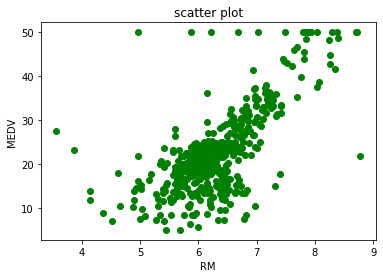

In [ ]:
# visualise the correlation between RM and MEDV and LSTAT and MEDV using scatter plot
RM = housing_data['RM'].tolist()
LSTAT = housing_data['LSTAT'].tolist()
MEDV = housing_target['MEDV'].tolist()

plt.scatter(RM, MEDV, color = 'green')
plt.title('scatter plot')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()


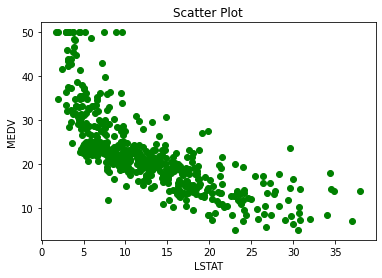

In [ ]:
plt.scatter(LSTAT, MEDV, color = 'green')
plt.title('Scatter Plot')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [ ]:
# creating the final feature list which includes both RM and LSTAT feature
temp = []
temp.append(RM)
temp.append(LSTAT)
feature = np.transpose(temp)

# creating the final target list  
target = MEDV



In [ ]:
import math
training_target, training_data = [],[]
# extracting 60% of the total dataset for training
for i in range(math.floor(len(boston.target) * 3 / 5)):
  training_target.append(target[i])
  training_data.append(feature[i])

# extracting 20% of the total dataset for validation
validation_target, validation_data = [],[]
for i in range(math.floor(len(boston.target) * 3 / 5), math.floor(len(boston.target) * 4 / 5)):
  validation_target.append(target[i])
  validation_data.append(feature[i])

# extracting the ramaining 20% of the total dataset for testing
testing_target, testing_data = [],[]
for i in range(math.floor(len(boston.target) * 4 / 5), len(boston.target)):
  testing_target.append(target[i])
  testing_data.append(feature[i])


# function to return the predicted value by the model when run on a given dataset
def getPrediction(data, parameters):
  prediction = []
  for row in data:
    temp = parameters[0]
    for j in range(len(row)):
      temp += row[j] * parameters[j+1]
    
    prediction.append(temp)

  return prediction


# gradient descent expression which returns the new parameter values
def getNewParametersValue(trainingData, trainingTarget, parameters, learning_rate):
  temp = []

  for i in range(len(training_data[0]) + 1):
    if (i == 0):
      loss = 0
      for j in range(len(training_data)):
        for k in range(len(training_data[j])):
          loss += (parameters[k+1] * training_data[j][k])
        loss += parameters[0]
        loss -= training_target[j]
      
      temp.append(parameters[i] - learning_rate * (loss / len(training_data)))
    
    else:
      sum = 0
      for j in range(len(training_data)):
        loss = 0
        for k in range(len(training_data[j])):
          loss += (parameters[k+1] * training_data[j][k])
        loss += parameters[0]
        loss -= training_target[j]
        loss *= training_data[j][i-1]
        sum += loss
      
      temp.append(parameters[i] - learning_rate * (sum / len(training_data)))
  
  for i in range(len(temp)):
    parameters[i] = temp[i]


# function to change learning rate on the basis of MAE change in validation set
def changeLearningrate(parameters, validation_data, validation_target, previous_MAE, learning_rate):
  prediction = getPrediction(validation_data, parameters)
  MAE = metrics.mean_absolute_error(validation_target, prediction)
  if (MAE > previous_MAE):
    learning_rate = 0.0000001
    return learning_rate
  
  return learning_rate


# start model training

# initalizing the parameters and hyperparameters

parameters = [0] * (len(training_data[0]) + 1)
learning_rate = 0.001
iteration = 0
training_MAE, validation_MAE = [],[]
previous_MAE = 1000000

training_prediction = getPrediction(training_data, parameters)
validation_prediction = getPrediction(validation_data, parameters)

training_MAE = metrics.mean_absolute_error(training_target, training_prediction)
validation_MAE = metrics.mean_absolute_error(validation_target, validation_prediction)

print("Initial Training MAE = " + str(training_MAE))
print("Initial validation MAE = " + str(validation_MAE))

# start training and validation
print("\n Training started!\n")

while (iteration <= 500):
  
  # get new parameters by fitting the line on the training dataset
  getNewParametersValue(training_data, training_target, parameters, learning_rate)

  #print('\n Parameters:')
  #print(parameters)

  training_prediction = getPrediction(training_data, parameters)
  training_MAE = metrics.mean_absolute_error(training_target, training_prediction)
  #print("\nTraining MAE = " + str(training_MAE))

  # change learning rate on the basis of average slope
  learning_rate = changeLearningrate(parameters, validation_data, validation_target, previous_MAE, learning_rate)
  #print("\nLearning Rate = " + str(learning_rate))

  validation_prediction = getPrediction(validation_data, parameters)
  validation_MAE = metrics.mean_absolute_error(validation_target, validation_prediction)
  previous_MAE = validation_MAE
  #print('\nValidation MAE = ' + str(validation_MAE))

  iteration += 1


print("\nTraining Complete")

#testing the model on the testing dataset
testing_prediction = getPrediction(testing_data, parameters)
print("\nPredicted vs Actual values on training Dataset")
print("\nActual target                  Predicted Target")
for i in range(len(testing_prediction)):
  print(str(testing_target[i]) + "                     "  + str(testing_prediction[i]))
testing_MAE = metrics.mean_absolute_error(testing_target, testing_prediction)
print("\n Testing MAE = " + str(testing_MAE))

print("\nParameters: ")
print(parameters)
print("\nFinal Performance Metrics:")
print("MAE in training dataset = " + str(training_MAE))
print("MAE in validation dataset = " + str(validation_MAE))
print("MAE in testing dataset = " + str(testing_MAE))


    
  

Initial Training MAE = 25.473927392739274
Initial validation MAE = 20.281188118811883

 Training started!


Training Complete

Predicted vs Actual values on training Dataset

Actual target                  Predicted Target
8.5                     13.774351979763622
5.0                     16.342033190016423
11.9                     9.226747847682812
27.9                     20.64697628757435
17.2                     14.581194017928933
27.5                     22.978468254151856
15.0                     22.182705150662315
17.2                     21.483669416849693
17.9                     6.7146268670597244
16.3                     15.203998260541812
7.0                     5.106654910568789
7.2                     17.128341621450627
7.5                     20.0913091347391
10.4                     13.068224774746982
8.8                     18.58645964197451
8.4                     21.585684407554723
16.7                     23.028345360876106
14.2                     20.91257372658366

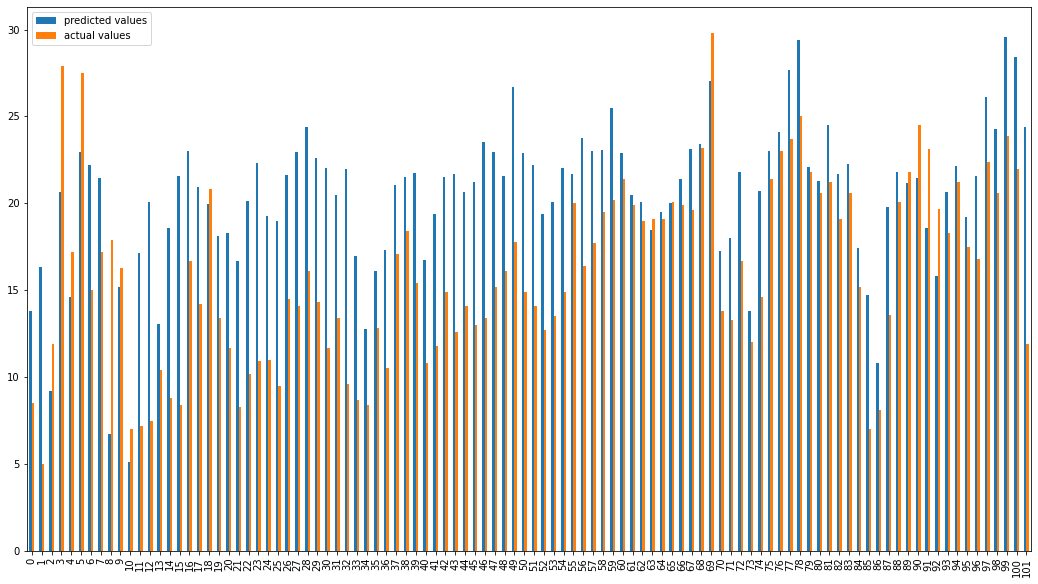

In [ ]:
temp = []
temp.append(testing_prediction)
temp.append(testing_target)

final_result = np.transpose(temp)
df = pd.DataFrame(data = final_result, columns = ['predicted values', 'actual values'])

f, ax = plt.subplots(figsize = (18,10))
df.plot.bar(y = ['predicted values', 'actual values'], ax = ax)
plt.show()

Notes on question 2:
In the above linear regression by gradient descent, the validation set was used to genrealise the model a lot. During the training process, one can observe, the MAE value on validation set to decrease, reach a minimum and again increase while MAE on training set keep decreasing. This may lead to a overfitting model. So to maintain  a fairly generalised model, the learning rate is decreased drastically to maintain low MAE on validation set while still keep on deacreasing the MAE on testing set by small amount. After the epochs finish, one can see MAE on testing set can still be decreased by increasing number epochs and retraining the model. But, this will lead to increasing MAE on validation set. Thus to have a overall low MAE, keep epoch value upto a limit.